<a href="https://colab.research.google.com/github/LucasTCook/Tensorflow_Introduction_Course/blob/master/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Introduction to Regression with Neural Networks in TensorFlow

 There are many definitions for a regression problem, but in our case we are going to simplify it. Predicting a numerical variable based on some other combination of variables. Or predicting a number.

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.14.0


### Creating some data to view and fit

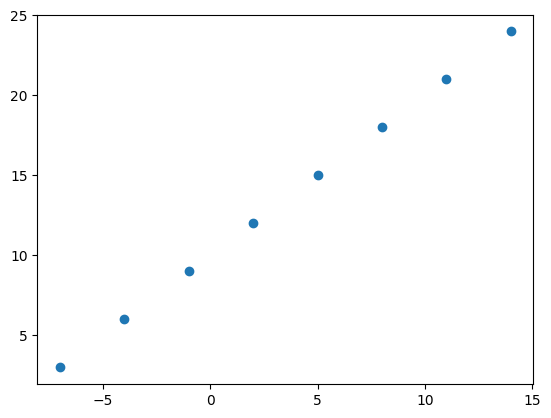

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create the features
X = np.array([-7.,-4., -1., 2., 5., 8.,11., 14.])

# Create labels
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])

# Visualize
plt.scatter(X,y)

In [ ]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [ ]:
# This is the relationship we want our NN to learn
# X is independent, y is dependant
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom", "garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
# Rank 0 tensor (scalar) has 0 dimensions

input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
y[0].ndim

0

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y= tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,out

NameError: ignored

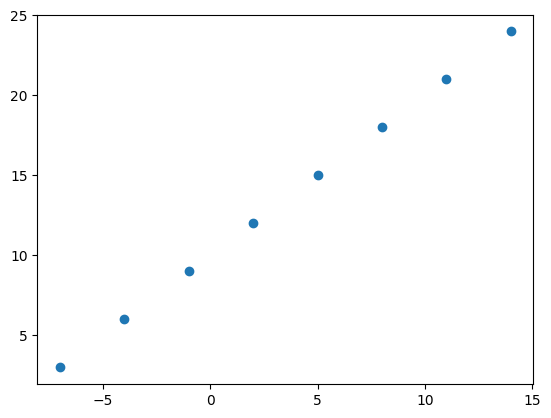

In [ ]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers as well as hidden layers in a depe learning model
2. **Compiling a model** - define the loss funtion (How wrong is the output) and the optimizer (how to improve) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)


In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [ ]:
# import keras

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 495ms/step - loss: 14.5333 - mae: 14.5333
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 14.4008 - mae: 14.4008
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 14.2683 - mae: 14.2683
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 14.1358 - mae: 14.1358
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 14.0033 - mae: 14.0033


In [ ]:
# Check out X and y
X,y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 99ms/step


array([[-1.9938419]], dtype=float32)

In [ ]:
# even with adding our loss the predition is not close to the expected value of 27
y_pred + 16.7487

array([[14.754857]], dtype=float32)

### Improving our model

We can improve our model by altering our steps we used to create the model

1. **Create a model** - Here we might add more layers, increase the number of hidden units (neurons) within each of the hidden layers, change the activation function of each layer
2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more epochs (train it for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Lets rebuild our model

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model (This time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 337ms/step - loss: 19.6683 - mae: 19.6683
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 19.3870 - mae: 19.3870
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 19.1058 - mae: 19.1058
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 18.8245 - mae: 18.8245
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 18.5433 - mae: 18.5433
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 18.2620 - mae: 18.2620
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 17.9808 - mae: 17.9808
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 17.6995 - mae: 17.6995
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 17.4183 - mae: 17.4183
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 17.1370 - mae: 17.1370
Epoch 11/100
1/1 [==============================

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 63ms/step


array([[29.665407]], dtype=float32)

In [ ]:
X = tf.expand_dims(X, axis=-1)
X

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [ ]:
# Lets rebuild our model with an additional hidden layer

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None), # adding this hidden layer with 100 hidden units
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae", # mae = mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.001), # Change the optimizer and lower the raise rate from default .001
              metrics=["mae"])

# 3. Fit the model (This time we will train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 619ms/step - loss: 11.3326 - mae: 11.3326
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2625 - mae: 11.2625
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1924 - mae: 11.1924
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1221 - mae: 11.1221
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0517 - mae: 11.0517
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 10.9812 - mae: 10.9812
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9105 - mae: 10.9105
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 10.8397 - mae: 10.8397
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.7687 - mae: 10.7687
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6976 - mae: 10.6976
Epoch 11/100
1/1 [==============================

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17])
y_pred

1/1 [==============================] - 0s 92ms/step


array([[31.41102]], dtype=float32)

### Evaluating a model

In practive a typical workflow when building neural networks

```
Build a Model -> fit -> evaluate -> tweak a model -> fit -> evaluate -> tweak a model ...
```

When evaluating:
> "Visualize, Visualize, Visualize"

* The data - what are we working with? What does it look like
* The model - what does our model look like?
* The training - How does the model perform during training
* The predictions - How do the predictions of a model line up against the ground truth

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

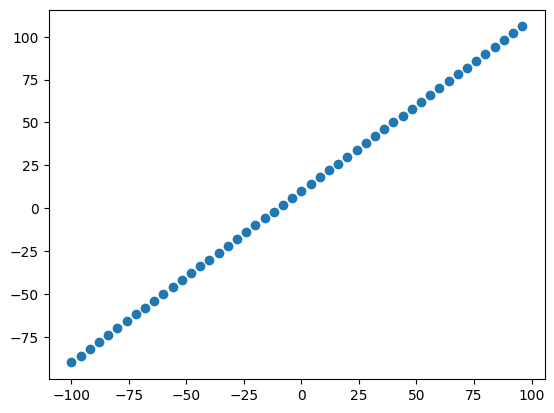

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets...

* **Training set** - the model learns from this data 70-80% of the total data available
* **Validation set** - the model gets tuned on this data 10-15% of the total data available
* **Test set** - the model gets evaluated on this data to test what it has learned 10-15% of the total data available

In [ ]:
# Check the length of how many samples we have

len(X)

50

In [ ]:
# Split the data into Train and Test sets
X_train = X[:40] # The first 40 to be training samples (80%)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20%)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data sets

Now we have the data in training and test sets... lets visualize

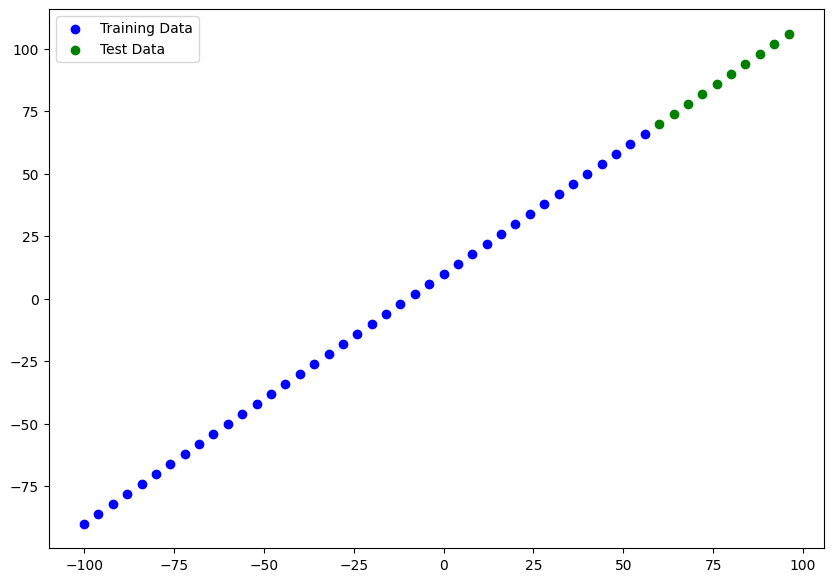

In [ ]:
plt.figure(figsize=(10,7))

#Plot training in red
plt.scatter(X_train, y_train, c="b", label="Training Data")

#Plot training in blue
plt.scatter(X_test, y_test, c="g", label="Test Data")

# Show a legend
plt.legend();

In [ ]:
# Lets build a neural network for our data

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae", # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model (This time we will train for longer)
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# lets create a model which build autimatically by defining the input shape argument in the first layer

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # input_shape = [1] because we are only passing one number
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Dense** = Fully connected hidden layer

* Total params - Total number of parameters in the model.
* Trainable params - Parameters (patterns) the model can update as it trains
* Non-Trainable params - Frozen patterns that we no longer want to train (typical when you bring in already learned patterns or params from other models during *transfer-learning*


**Resource:**  MIT's into to Deep Learning https://www.youtube.com/watch?v=QDX-1M5Nj7s&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2

In [ ]:
# Modifying the number of units in a Dense layer to analyze the Trainable params

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]) # input_shape = [1] because we are only passing one number
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Modifying the number of units in a Dense layer to analyze the Trainable params

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name="layer1"), # input_shape = [1] because we are only passing one number
    tf.keras.layers.Dense(100, input_shape=[1], name="layer2"),
    tf.keras.layers.Dense(1, input_shape=[1], name="layer3")
], name="nameOfModel")

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr="0.01"),
              metrics=["mae"])

model.summary()

Model: "nameOfModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 100)               200       
                                                                 
 layer2 (Dense)              (None, 100)               10100     
                                                                 
 layer3 (Dense)              (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


*It seems like the number of trainable parameters is equal to 2 * the number of units in the Dense layer (2 trainable layers per hidden unit)*

In [ ]:
# Lets fit our model to the training data

# 3. Fit the model (This time we will train for longer)
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "nameOfModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 100)               200       
                                                                 
 layer2 (Dense)              (None, 100)               10100     
                                                                 
 layer3 (Dense)              (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


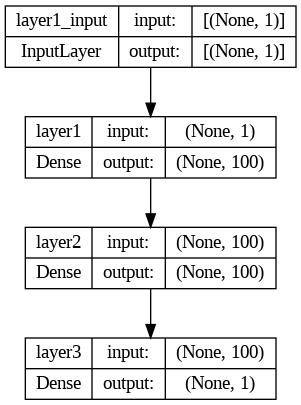

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing Predictions

To visualize predictions it is a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred`

In [ ]:
# Make Some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[ 67.37853 ],
       [ 71.2085  ],
       [ 75.03848 ],
       [ 78.86846 ],
       [ 82.69842 ],
       [ 86.52839 ],
       [ 90.358376],
       [ 94.18834 ],
       [ 98.01831 ],
       [101.84827 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**If you feel like you are going to reuse functionality, turn it into a function**

In [ ]:
# Lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")

  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")

  #Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend()

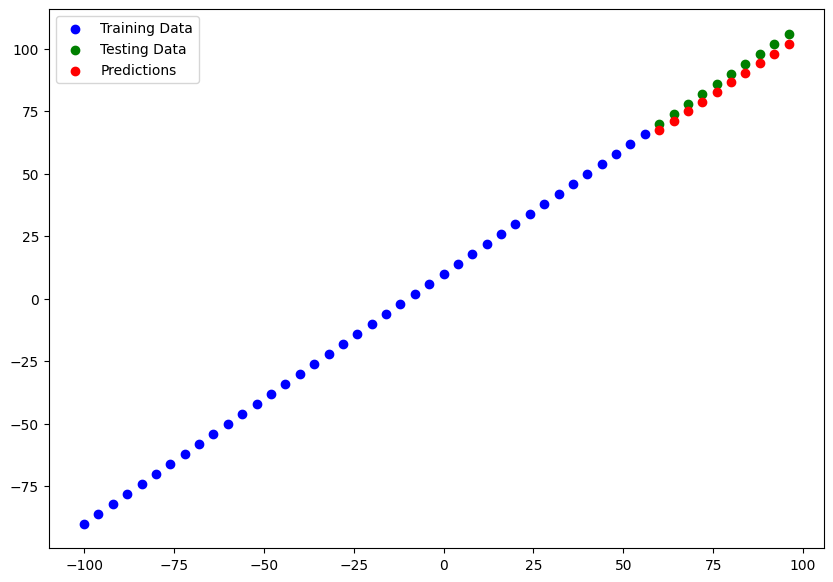

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation matrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we are working on a regression problem, two of the main metrics:
* MAE - mean absolute error (on avg, how wrong is each of my model's predictions)
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 148ms/step - loss: 3.3866 - mae: 3.3866


[3.386592149734497, 3.386592149734497]

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 67.37853 ],
       [ 71.2085  ],
       [ 75.03848 ],
       [ 78.86846 ],
       [ 82.69842 ],
       [ 86.52839 ],
       [ 90.358376],
       [ 94.18834 ],
       [ 98.01831 ],
       [101.84827 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**The `y_test` and `y_pred` are not the same shape!!!!**

In [ ]:
# Calculate the Mean absolute error

In [ ]:
mae = tf.keras.losses.MAE(y_true=y_test,y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.621468, 17.033197, 14.17691 , 12.052615, 10.660316, 10.      ,
       10.071675, 10.875336, 12.410986, 14.70896 ], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 67.37853 ,  71.2085  ,  75.03848 ,  78.86846 ,  82.69842 ,
        86.52839 ,  90.358376,  94.18834 ,  98.01831 , 101.84827 ],
      dtype=float32)>

**We need to squeeze `y_pred` to make it the same shape as `y_test`**

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=3.3865921>

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 26ms/step - loss: 3.3866 - mae: 3.3866


[3.386592149734497, 3.386592149734497]

**The results are now the same**

In [ ]:
# Calculate the mean square error
mse = tf.keras.losses.MSE(y_true=y_test,
                          y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.707512>

In [ ]:
# Create a reusable function for MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true=y_test,
                             y_pred=tf.squeeze(y_pred)).numpy()

def mse(y_true,y_pred):
  return tf.keras.losses.MSE(y_true=y_true,
                             y_pred=tf.squeeze(y_pred)).numpy()

### Running experiments to improve our model

```
"Experiment,Experiment,Experiment"
```

1. Get more data - more examples for the model to train on (more opportunities to learn patterns)
2. Make our model larger (using a more complex model) - more layers or more hidden units in each layer
3. Train for longer -  give your model more of a chance to find patterns in the data

Lets do 3 modelling experiments
1. `Model 1:` Same as original model, 1 layer, but trained 100 epochs
2. `Model 2`: 2 layers, trained for 100 epochs
3. `Model 3:` 2 layers, trained for 500 epochs

**Build Model 1**

1 layer, but trained 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2 Compile your model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model_1.fit(tf.expand_dims(X_train,-1),y_train,epochs=100,verbose=0)

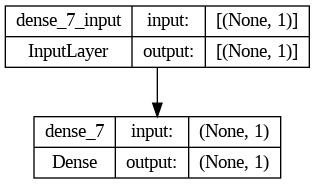

In [ ]:
plot_model(model_1, show_shapes=True)

1/1 [==============================] - 0s 71ms/step


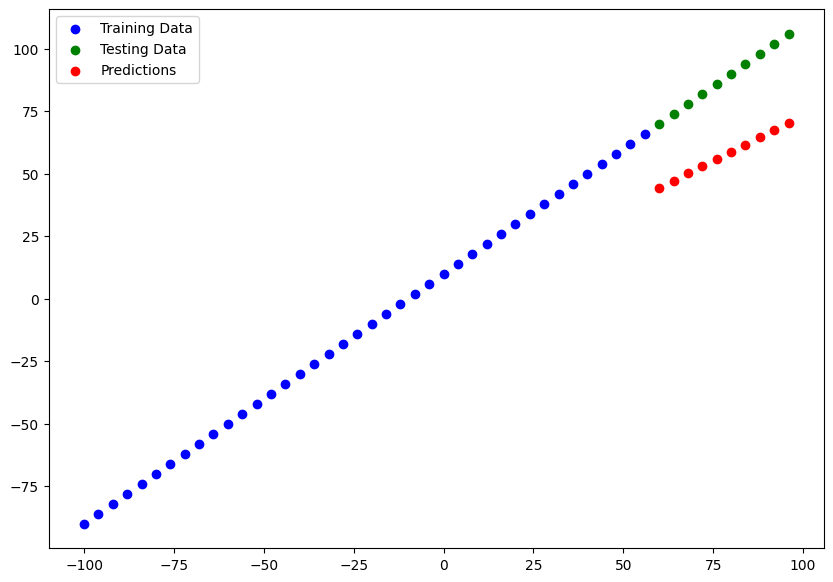

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate evaluiation metrics for model_1
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)

mae_1,mse_1

(30.658787, 950.38947)

**Build Model 2**

2 layer, but trained 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2 Compile your model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model_2.fit(tf.expand_dims(X_train,-1),y_train,epochs=100,verbose=0)

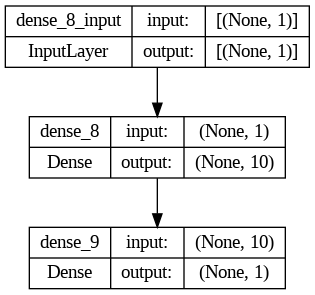

In [ ]:
plot_model(model_2, show_shapes=True)

1/1 [==============================] - 0s 86ms/step


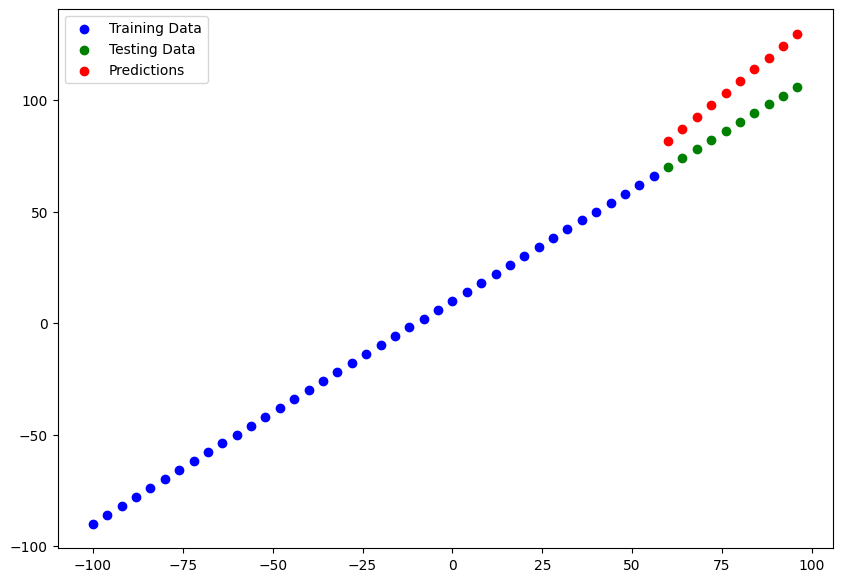

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate evaluiation metrics for model_2
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)

mae_2,mse_2

(17.68848, 327.50903)

**Build Model 3**

2 layers, trained for 500 epochs

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500, verbose=0)

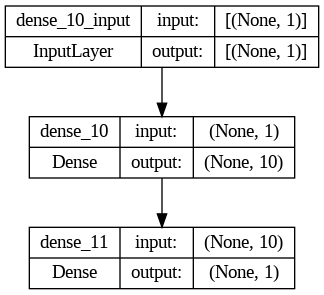

In [ ]:
plot_model(model_3, show_shapes=True)

1/1 [==============================] - 0s 55ms/step


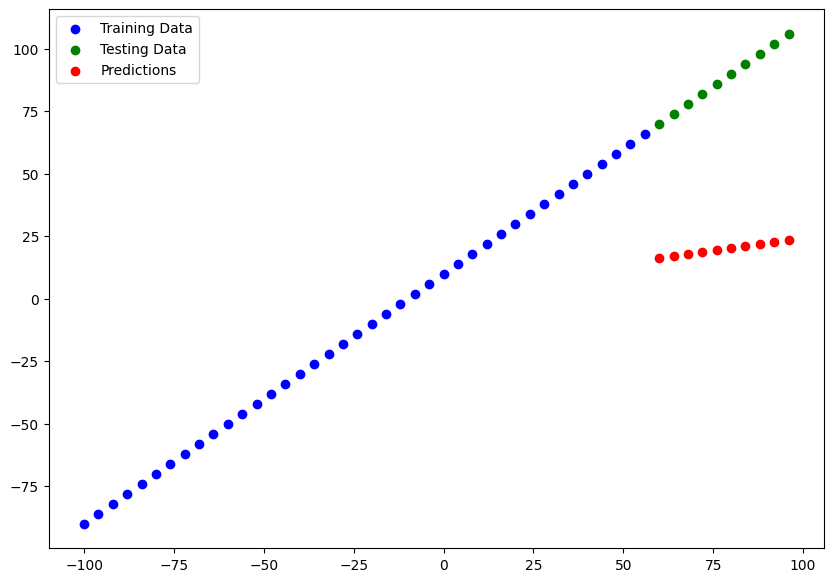

In [ ]:
# Make predictions on model 3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate evaluiation metrics for model_3
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)

mae_3,mse_3

(67.91804, 4697.3486)

**OVERFIT THE MODEL**

## Comparing the results of our expiriments

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.658787,950.389465
1,model_2,17.688480,327.509033
2,model_3,67.918037,4697.348633


**Looks like Model_2 ran the best**

In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking your expiriments

One really good habit is to track the results of your expiriments. And when doing so it can be tedious when running lots of expiriments. Luckily there are tools to help us

**Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track the modelling experiments
* Weights & Biases - a tool for tracking all kinds of ML experiments


## Saving our Models

Saving our models allows us to use them outside of Google Colab (or original training environment) such as in a web app or a mobile app

There are 2 main formats:
1. `SavedModel` (Default)
2. `HDF5`
3. `keras` *NEW*


In [ ]:
# Save a model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save a model as HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save a model using keras format
model_2.save("best_model_keras_format.keras")

##Loading in a saved model

In [ ]:
#Load in the model from each save format to reevaluate and make sure it saved correctly
#Load SavedModel
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_HDF5_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_keras_format = tf.keras.models.load_model("/content/best_model_keras_format.keras")

In [ ]:
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loaded_HDF5_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loaded_keras_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the patterns to make sure they are identical
model_2_preds = model_2.predict(X_test)
SavedModel_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == SavedModel_preds

1/1 [==============================] - 0s 54ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
HDF5_preds = loaded_HDF5_format.predict(X_test)
model_2_preds == HDF5_preds

1/1 [==============================] - 0s 53ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
keras_preds = loaded_keras_format.predict(X_test)
model_2_preds == keras_preds

1/1 [==============================] - 0s 59ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model or any other file from Google Colab

1. Go to "Files" tab and right click on the file you're after and click download
2. Use code (see below)]
3. Save it to Google Drive

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Copy a file over to Google Drive
!cp -r /content/best_model_SavedModel_format /content/drive/MyDrive/TensorFlow_Courses/Daniel_Bourke_Intro_Course

In [ ]:
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlow_Courses/Daniel_Bourke_Intro_Course

In [ ]:
!cp /content/best_model_keras_format.keras /content/drive/MyDrive/TensorFlow_Courses/Daniel_Bourke_Intro_Course

In [ ]:
!ls /content/drive/MyDrive/TensorFlow_Courses/Daniel_Bourke_Intro_Course

best_model_HDF5_format.h5  best_model_keras_format.keras  best_model_SavedModel_format


## A larger example

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [10]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
# Convert non-numerical columns into numbers using one-hot encoding
# pandas.get_dummies()
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [13]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [14]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [15]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [16]:
# Create training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X),len(X_train), len(X_test)

(1338, 1070, 268)

In [17]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a Model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8646.8740 - mae: 8646.8740
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7860.8652 - mae: 7860.8652
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7549.0176 - mae: 7549.0176
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7680.7002 - mae: 7680.7002
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.0552 - mae: 7748.0552
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7653.3452 - mae: 7653.3452
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7594.5449 - mae: 7594.5449
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7800.4150 - mae: 7800.4150
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.2524 - mae: 7595.2524
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7730.4727 - mae: 7730.4727

In [18]:
# Check the results of the insurance_model on the test data

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8751.1455 - mae: 8751.1455


[8751.1455078125, 8751.1455078125]

In [19]:
# this mae is proving that our model is substantially wrong, here is the median and mean to cross reference
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Let's run some expirements to improve the model

To try and improve our model, we'll run 2 expirements
1. Add an extra layer with more hidden units and use Adam optimizer
2. Same as above but Train for longer
3. Same as above, but extend the training time and implement `EarlyStopping` callback

**Build experiment #1**

In [20]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # added this layer
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13263.9971 - mae: 13263.9971
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13032.9238 - mae: 13032.9238
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12574.7979 - mae: 12574.7979
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11719.0098 - mae: 11719.0098
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10397.0986 - mae: 10397.0986
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 8898.8857 - mae: 8898.8857
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7780.3530 - mae: 7780.3530
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7459.0317 - mae: 7459.0317
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7418.3594 - mae: 7418.3594
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7397.7798 - mae:

In [21]:
# Evalute the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4498.2998 - mae: 4498.2998


[4498.2998046875, 4498.2998046875]

In [22]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8751.1455 - mae: 8751.1455


[8751.1455078125, 8751.1455078125]

Text(0.5, 0, 'epochs')

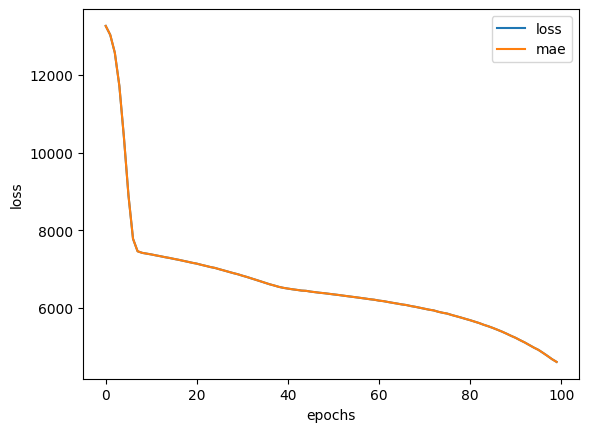

In [23]:
# Plot the history (also known as a loss curve or a training curve)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

*Improved by ~3000*

**Build Experiment #2**

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history_3 = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=2) #increased the number of epochs to 200

Epoch 1/200
34/34 - 1s - loss: 13307.5000 - mae: 13307.5000 - 806ms/epoch - 24ms/step
Epoch 2/200
34/34 - 0s - loss: 13155.1836 - mae: 13155.1836 - 64ms/epoch - 2ms/step
Epoch 3/200
34/34 - 0s - loss: 12835.0420 - mae: 12835.0420 - 70ms/epoch - 2ms/step
Epoch 4/200
34/34 - 0s - loss: 12191.1699 - mae: 12191.1699 - 63ms/epoch - 2ms/step
Epoch 5/200
34/34 - 0s - loss: 11081.0869 - mae: 11081.0869 - 65ms/epoch - 2ms/step
Epoch 6/200
34/34 - 0s - loss: 9614.2480 - mae: 9614.2480 - 73ms/epoch - 2ms/step
Epoch 7/200
34/34 - 0s - loss: 8243.9746 - mae: 8243.9746 - 61ms/epoch - 2ms/step
Epoch 8/200
34/34 - 0s - loss: 7554.0669 - mae: 7554.0669 - 62ms/epoch - 2ms/step
Epoch 9/200
34/34 - 0s - loss: 7436.3223 - mae: 7436.3223 - 66ms/epoch - 2ms/step
Epoch 10/200
34/34 - 0s - loss: 7414.5737 - mae: 7414.5737 - 58ms/epoch - 2ms/step
Epoch 11/200
34/34 - 0s - loss: 7395.5239 - mae: 7395.5239 - 74ms/epoch - 2ms/step
Epoch 12/200
34/34 - 0s - loss: 7373.1665 - mae: 7373.1665 - 66ms/epoch - 2ms/step
E

In [25]:
# Evalute the third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.7397 - mae: 3488.7397


[3488.73974609375, 3488.73974609375]

In [26]:
insurance_model.evaluate(X_test,y_test)


9/9 [==============================] - 0s 2ms/step - loss: 8751.1455 - mae: 8751.1455


[8751.1455078125, 8751.1455078125]

*Halfed the mae from the initial model*

Text(0.5, 0, 'epochs')

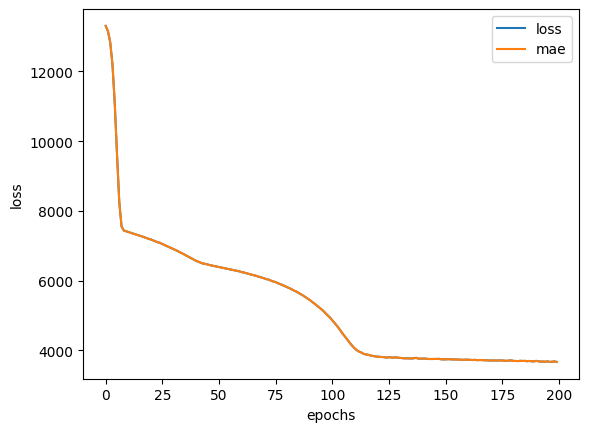

In [27]:
# Plot the history (also known as a loss curve or a training curve)
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> ❓**Question** How long should you train for?

It depends... but TensorFlow has thought of a solution. [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) A TensorFlow component you can add to your model to stop training when it stops improving a certain metric.

**Build Experiment 3**

In [28]:
# Set random seed
tf.random.set_seed(42)

# 0. Create a Callback for EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5) ## will stop learning when the loss is not improved over 5 epochs

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history_4 = insurance_model_4.fit(X_train, y_train, callbacks=[callback], epochs=500, verbose=2) #increased the number of epochs to 500

Epoch 1/500
34/34 - 1s - loss: 13315.3145 - mae: 13315.3145 - 790ms/epoch - 23ms/step
Epoch 2/500
34/34 - 0s - loss: 13187.7627 - mae: 13187.7627 - 67ms/epoch - 2ms/step
Epoch 3/500
34/34 - 0s - loss: 12906.5664 - mae: 12906.5664 - 61ms/epoch - 2ms/step
Epoch 4/500
34/34 - 0s - loss: 12327.6006 - mae: 12327.6006 - 68ms/epoch - 2ms/step
Epoch 5/500
34/34 - 0s - loss: 11301.6914 - mae: 11301.6914 - 71ms/epoch - 2ms/step
Epoch 6/500
34/34 - 0s - loss: 9873.1328 - mae: 9873.1328 - 64ms/epoch - 2ms/step
Epoch 7/500
34/34 - 0s - loss: 8439.6182 - mae: 8439.6182 - 64ms/epoch - 2ms/step
Epoch 8/500
34/34 - 0s - loss: 7614.4917 - mae: 7614.4917 - 68ms/epoch - 2ms/step
Epoch 9/500
34/34 - 0s - loss: 7445.1729 - mae: 7445.1729 - 64ms/epoch - 2ms/step
Epoch 10/500
34/34 - 0s - loss: 7422.3364 - mae: 7422.3364 - 68ms/epoch - 2ms/step
Epoch 11/500
34/34 - 0s - loss: 7404.3667 - mae: 7404.3667 - 72ms/epoch - 2ms/step
Epoch 12/500
34/34 - 0s - loss: 7383.3169 - mae: 7383.3169 - 62ms/epoch - 2ms/step
E

In [34]:
# Evalute the fourth model
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3498.1184 - mae: 3498.1184


[3498.118408203125, 3498.118408203125]

Text(0.5, 0, 'epochs')

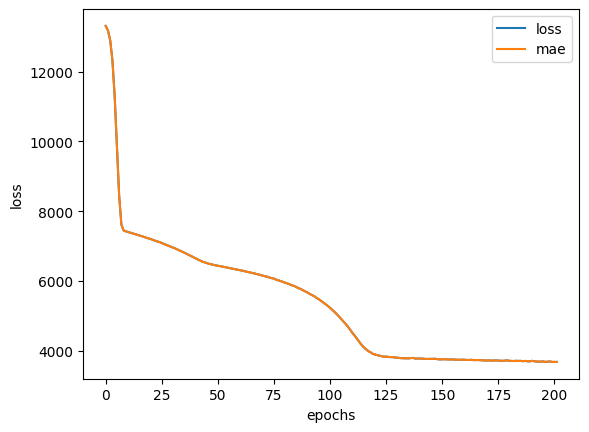

In [35]:
# Plot the history (also known as a loss curve or a training curve)
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [36]:
# How many epochs did it learn?
len(history_4.history['loss'])

202

📝**Note:** The fit only ran for 202 epochs before it stopped improving

### Preprocessing data (normalization and standardization)